In [11]:
#!/bin/env python

from __future__ import absolute_import, division, print_function, unicode_literals

import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"
import numpy as np
import time


import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,20)


import time, re, sys, os
import numpy as np
import PIL.Image

import xarray as xr
from glob import glob


In [8]:

# from mpl_toolkits.basemap import Basemap


file_path = "/global/cscratch1/sd/karthik_/CAM5.1_0.25degree/"

files = sorted(glob(file_path + "*.nc"))
  

In [9]:
# print('\n'.join(map(str, files)))
print(len(files))

1321


(8, 512, 512)


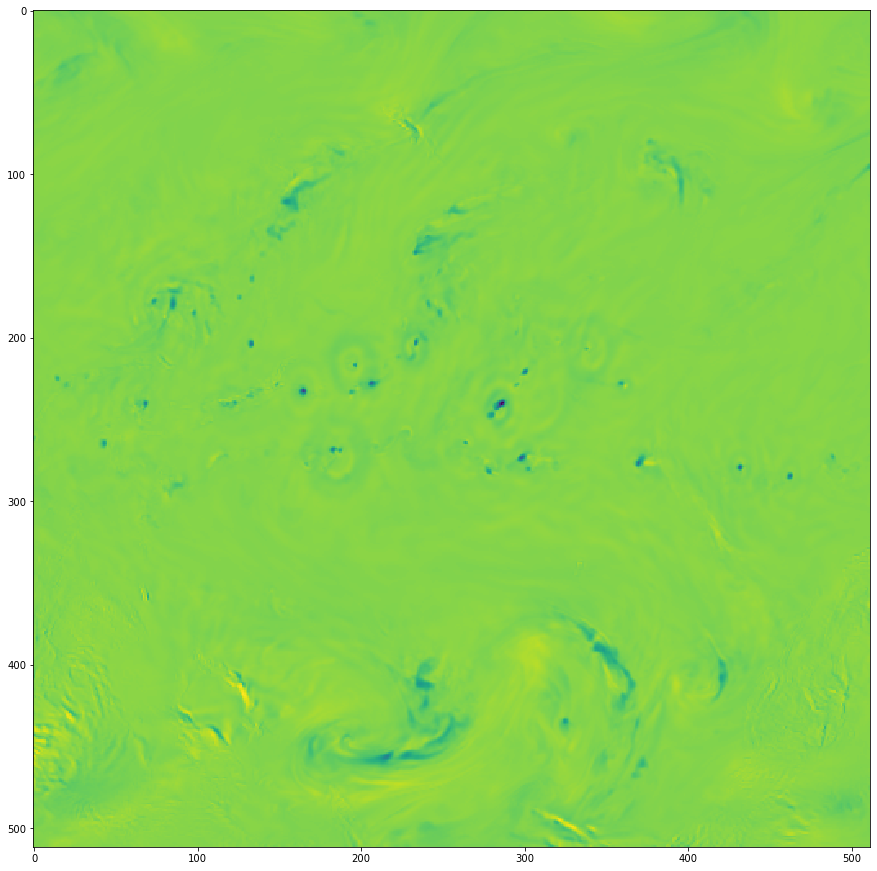

In [14]:

# plotting one random image from the real data

ds = xr.open_dataset(files[0], decode_times=False	)
data = ds["OMEGA500"][:, 128:640, 320:832].values
print(data.shape)
plt.imshow(data[0])
plt.savefig("original_data_omega_512_plot.png", dpi=200)

In [10]:
t = time.time()

for file in files:
    ds = xr.open_dataset(file, decode_times=False	)
    print("Time takes : ", time.time()-t)

Time takes :  1.546480655670166
Time takes :  1.5695242881774902
Time takes :  1.5912761688232422
Time takes :  1.614018440246582
Time takes :  1.6359343528747559
Time takes :  1.657841682434082
Time takes :  1.6796600818634033
Time takes :  1.7027392387390137
Time takes :  1.7250473499298096
Time takes :  1.7464237213134766
Time takes :  1.7709853649139404
Time takes :  1.7943856716156006
Time takes :  1.816258430480957
Time takes :  1.8376376628875732
Time takes :  1.8594493865966797
Time takes :  1.8811349868774414
Time takes :  1.902698040008545
Time takes :  1.9242007732391357
Time takes :  1.945511817932129
Time takes :  1.9671416282653809
Time takes :  1.9891471862792969
Time takes :  2.0112833976745605
Time takes :  2.0324015617370605
Time takes :  2.0537779331207275
Time takes :  2.0753047466278076
Time takes :  2.096626043319702
Time takes :  2.1182687282562256
Time takes :  2.140622854232788
Time takes :  2.1642343997955322
Time takes :  2.1900274753570557
Time takes :  2.21

KeyboardInterrupt: 

In [10]:
ds.keys()


KeysView(<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 768, lev: 30, lon: 1152, nbnd: 2, slat: 767, slon: 1152, time: 8)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
  * lat           (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.53 89.77 90.0
  * lon           (lon) float64 0.0 0.3125 0.625 0.9375 ... 359.1 359.4 359.7
  * slat          (slat) float64 -89.88 -89.65 -89.41 ... 89.41 89.65 89.88
  * slon          (slon) float64 -0.1562 0.1562 0.4688 ... 358.9 359.2 359.5
Dimensions without coordinates: nbnd
Data variables:
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    P0            float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    w_stag        (s

In [6]:
ds["OMEGA500"].shape

(8, 768, 1152)

In [12]:
ds["OMEGA500"][:,0,0]


<xarray.DataArray 'OMEGA500' (time: 8)>
array([-0.011843, -0.025709, -0.030049, -0.022776, -0.038136, -0.028068,
       -0.002238,  0.024157], dtype=float32)
Coordinates:
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
    lat      float64 -90.0
    lon      float64 0.0
Attributes:
    units:         Pa/s
    long_name:     Vertical velocity at 500 mbar pressure surface
    cell_methods:  time: mean

In [13]:
ds["OMEGA500"][:,0,1]

<xarray.DataArray 'OMEGA500' (time: 8)>
array([-0.011843, -0.025709, -0.030049, -0.022776, -0.038136, -0.028068,
       -0.002238,  0.024157], dtype=float32)
Coordinates:
  * time     (time) float64 0.0 0.125 0.25 0.375 0.5 0.625 0.75 0.875
    lat      float64 -90.0
    lon      float64 0.3125
Attributes:
    units:         Pa/s
    long_name:     Vertical velocity at 500 mbar pressure surface
    cell_methods:  time: mean

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,20)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-9.689267 , -9.6881485, -9.687029 , ...,  6.7806125,  6.7817316,
         6.7828507], dtype=float32),
 <a list of 1 Patch objects>)

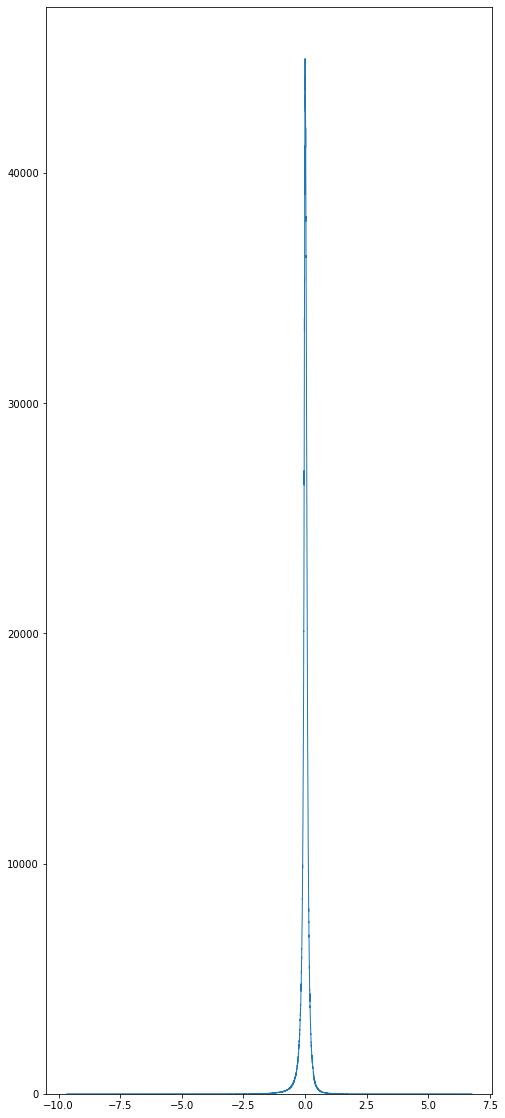

In [34]:
original_data = ds["OMEGA500"].values
plt.hist(original_data.flatten(), bins='fd', histtype='step')

(8, 512, 512)


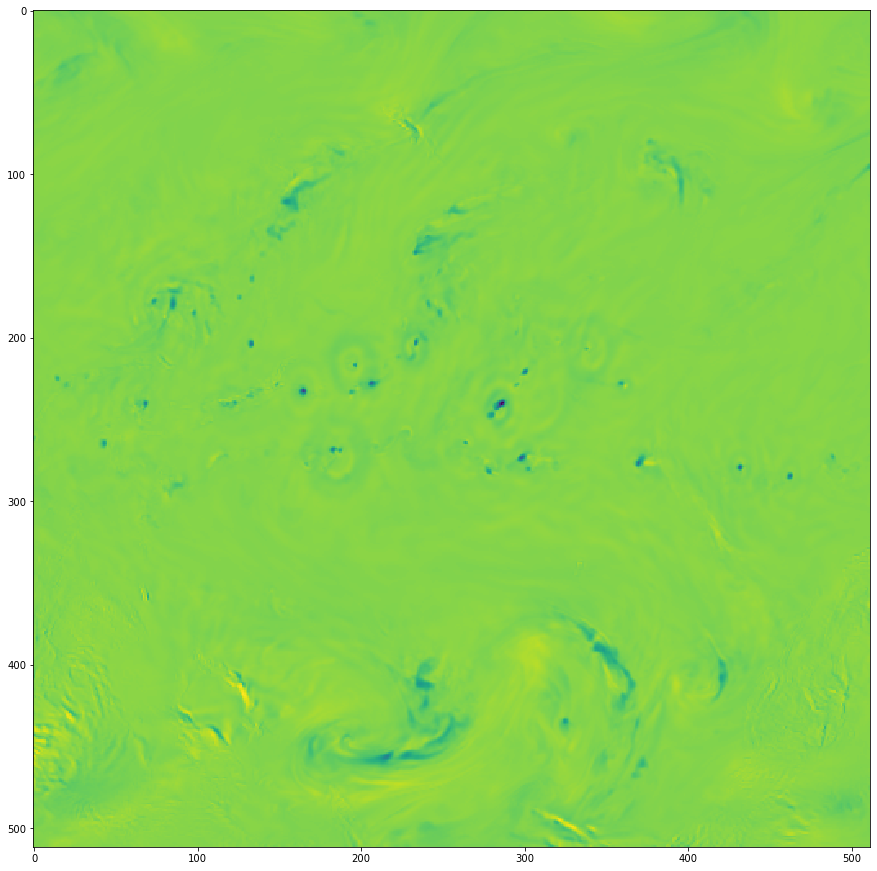

In [12]:
data = ds["OMEGA500"][:, 128:640, 320:832].values
print(data.shape)
plt.imshow(data[0])

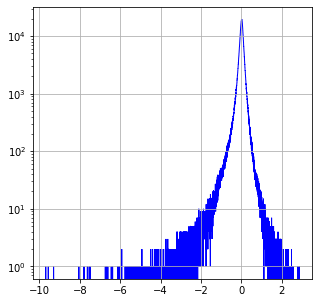

In [18]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.hist( data.flatten(), bins='fd', color='b', histtype='step')
plt.yscale('log', nonposy='clip')
plt.grid(True)

In [23]:
max_val, min_val, std_val, mean_val = data.max(), data.min(), data.std(), data.mean()

In [24]:
print("Original all data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))

max_val 6.782850742340088  min_val -9.6892671585083  std_val 0.18770195543766022  mean_val 0.0004564703849609941 


In [25]:
data_normalized = (data-mean_val)/std_val

In [26]:
data_normalized.shape

(7077888,)

In [32]:
max_val, min_val, std_val, mean_val = data.max(), data.min(), data.std(), data.mean()

In [33]:
print("only relevant  data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))

only relevant  data max_val 2.8797972202301025  min_val -9.6892671585083  std_val 0.19376632571220398  mean_val 0.0007547858403995633 


In [42]:
list_of_omega_data = []
for file in files:
    t=time.time()
    tmp_ds = xr.open_dataset(file, decode_times=False)
    print("Time takes : ", time.time()-t)
    list_of_omega_data.append(tmp_ds["OMEGA500"][:, 128:640, 320:832].values)
    

Time takes :  0.023864269256591797
Time takes :  0.025614023208618164
Time takes :  0.026124954223632812
Time takes :  0.02542424201965332
Time takes :  0.02521538734436035
Time takes :  0.024729013442993164
Time takes :  0.026955366134643555
Time takes :  0.02469921112060547
Time takes :  0.02513909339904785
Time takes :  0.024843454360961914
Time takes :  0.0246737003326416
Time takes :  0.024850130081176758
Time takes :  0.026397228240966797
Time takes :  0.02453923225402832
Time takes :  0.02506709098815918
Time takes :  0.02464008331298828
Time takes :  0.024856090545654297
Time takes :  0.025044918060302734
Time takes :  0.024099111557006836
Time takes :  0.024486303329467773
Time takes :  0.024967670440673828
Time takes :  0.02462172508239746
Time takes :  0.02474379539489746
Time takes :  0.02772068977355957
Time takes :  0.02731466293334961
Time takes :  0.026745319366455078
Time takes :  0.02595233917236328
Time takes :  0.026487112045288086


In [43]:

final_data = np.concatenate(list_of_omega_data, axis=0)


In [45]:
final_data.shape
max_val, min_val, std_val, mean_val = final_data.max(), final_data.min(), final_data.std(), final_data.mean()
print("final_data max_val {}  min_val {}  std_val {}  mean_val {} ".format(max_val, min_val, std_val, mean_val))
final_normalized_data = (final_data-mean_val)/std_val


final_data max_val 6.457225799560547  min_val -10.614160537719727  std_val 0.2059687376022339  mean_val -0.0023664627224206924 


([array([0., 0., 0., ..., 0., 0., 0.]), array([1., 0., 0., ..., 0., 0., 1.])],
 array([-51.521385, -51.520287, -51.519188, ...,  31.359806,  31.360905,
         31.362003], dtype=float32),
 <a list of 2 Lists of Patches objects>)

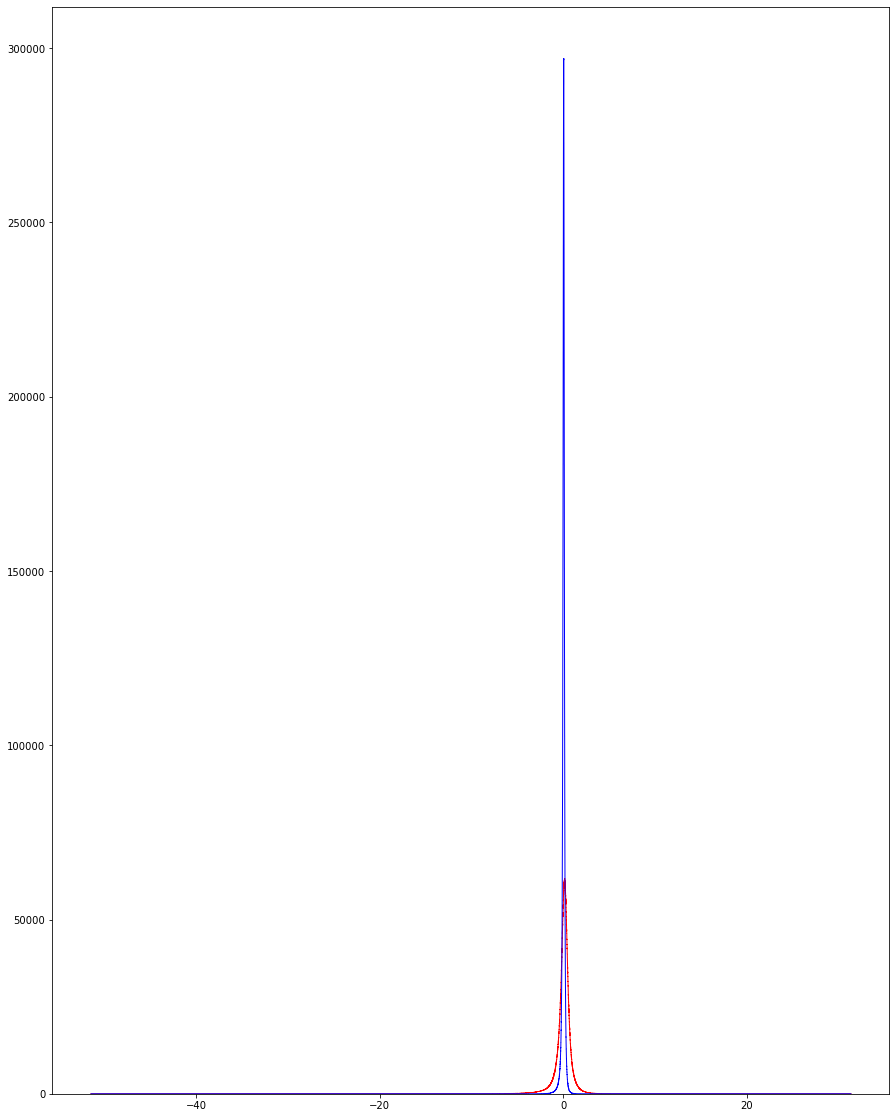

In [48]:
plt.hist([final_data.flatten(), final_normalized_data.flatten()], bins='fd', color=['b', 'r'], histtype='step')

In [51]:
total_seeds

[8477, 4342, 5617, 6317, 1946, 2792, 9681, 2855, 4660, 2298]

In [ ]:
list_of_omega_data = []
from tqdm import tqdm, trange
for _, file in tqdm(enumerate(files)):
    t=time.time()
    tmp_ds = xr.open_dataset(file, decode_times=False)
    print("Time takes : ", time.time()-t)
    list_of_omega_data.append(tmp_ds["OMEGA500"][:, 128:640, 320:832].values)
    
    
numpy_array_of_omega = np.concatenate(list_of_omega_data, axis=0)
print(numpy_array_of_omega.shape)

0it [00:00, ?it/s]

Time takes :  0.30388498306274414


1it [00:00,  1.84it/s]

Time takes :  0.38170528411865234


2it [00:01,  1.65it/s]

Time takes :  0.30733275413513184


3it [00:01,  1.71it/s]

Time takes :  0.35396552085876465


4it [00:02,  1.66it/s]

Time takes :  0.3405117988586426


5it [00:03,  1.55it/s]

Time takes :  0.42578768730163574


6it [00:04,  1.45it/s]

Time takes :  0.5062968730926514


7it [00:04,  1.38it/s]

Time takes :  0.28539299964904785


8it [00:05,  1.44it/s]

Time takes :  0.26390886306762695


9it [00:05,  1.58it/s]

Time takes :  0.30579662322998047


10it [00:06,  1.62it/s]

Time takes :  0.3339543342590332


11it [00:07,  1.65it/s]

Time takes :  0.2860562801361084


12it [00:07,  1.70it/s]

Time takes :  0.330564022064209


13it [00:08,  1.60it/s]

Time takes :  0.3418262004852295


14it [00:09,  1.57it/s]

Time takes :  0.2904317378997803


15it [00:09,  1.57it/s]

Time takes :  0.4932591915130615


16it [00:10,  1.35it/s]

Time takes :  0.445847749710083


17it [00:11,  1.30it/s]

Time takes :  0.3811936378479004


18it [00:12,  1.33it/s]

Time takes :  0.30344581604003906


19it [00:12,  1.43it/s]

Time takes :  0.3112204074859619


20it [00:13,  1.44it/s]

Time takes :  0.31653285026550293


21it [00:14,  1.44it/s]

Time takes :  0.3274850845336914


22it [00:14,  1.52it/s]

Time takes :  0.27063512802124023


23it [00:15,  1.65it/s]

Time takes :  0.3015458583831787


24it [00:15,  1.72it/s]

Time takes :  0.35941576957702637


25it [00:16,  1.67it/s]

Time takes :  0.34700870513916016


26it [00:16,  1.63it/s]

Time takes :  0.2791149616241455


27it [00:17,  1.65it/s]

Time takes :  0.30977559089660645


28it [00:18,  1.66it/s]

Time takes :  0.3119010925292969


29it [00:18,  1.63it/s]

Time takes :  0.36849212646484375


30it [00:19,  1.50it/s]

Time takes :  0.46319055557250977


31it [00:20,  1.36it/s]

Time takes :  0.46585559844970703


32it [00:21,  1.31it/s]

Time takes :  0.949704647064209


33it [00:22,  1.08it/s]

Time takes :  0.3245413303375244


34it [00:23,  1.21it/s]

Time takes :  0.24221158027648926


35it [00:23,  1.36it/s]

Time takes :  0.2749812602996826


36it [00:24,  1.44it/s]

Time takes :  0.30922532081604004


37it [00:24,  1.55it/s]

Time takes :  0.33005714416503906


38it [00:25,  1.50it/s]

Time takes :  0.3678867816925049


39it [00:26,  1.46it/s]

Time takes :  0.40854644775390625


40it [00:27,  1.23it/s]

Time takes :  0.29958343505859375


41it [00:28,  1.36it/s]

Time takes :  0.26807451248168945


42it [00:28,  1.43it/s]

Time takes :  0.2788734436035156


43it [00:29,  1.56it/s]

Time takes :  0.2606625556945801


44it [00:29,  1.66it/s]

Time takes :  0.3081932067871094


45it [00:30,  1.73it/s]

Time takes :  0.2510240077972412


46it [00:30,  1.81it/s]

Time takes :  0.2997932434082031


47it [00:31,  1.84it/s]

Time takes :  0.3812835216522217


48it [00:31,  1.62it/s]

Time takes :  0.3139963150024414


49it [00:32,  1.66it/s]

Time takes :  0.362903356552124


50it [00:33,  1.54it/s]

Time takes :  0.29181599617004395


51it [00:33,  1.52it/s]

Time takes :  0.33821606636047363


52it [00:34,  1.50it/s]

Time takes :  0.34180140495300293


53it [00:35,  1.51it/s]

Time takes :  0.29982876777648926


54it [00:35,  1.54it/s]

Time takes :  0.35215187072753906


55it [00:36,  1.59it/s]

Time takes :  0.34577465057373047


56it [00:37,  1.61it/s]

Time takes :  0.2907569408416748


57it [00:37,  1.66it/s]

Time takes :  0.3664524555206299


58it [00:38,  1.68it/s]

Time takes :  0.2866995334625244


59it [00:38,  1.68it/s]

Time takes :  0.4105861186981201


60it [00:39,  1.60it/s]

Time takes :  0.29724645614624023


61it [00:40,  1.60it/s]

Time takes :  0.48768043518066406


62it [00:41,  1.43it/s]

Time takes :  0.3094322681427002


63it [00:41,  1.51it/s]

Time takes :  0.32154369354248047


64it [00:42,  1.52it/s]

Time takes :  0.35242462158203125


65it [00:42,  1.48it/s]

Time takes :  0.3709542751312256


66it [00:43,  1.52it/s]

Time takes :  0.2200911045074463


67it [00:44,  1.57it/s]

Time takes :  0.2806861400604248


68it [00:44,  1.67it/s]

Time takes :  0.3605184555053711


69it [00:45,  1.61it/s]

Time takes :  0.2883119583129883


70it [00:45,  1.66it/s]

Time takes :  0.3135654926300049


71it [00:46,  1.64it/s]

Time takes :  0.28837156295776367


72it [00:47,  1.74it/s]

Time takes :  0.4289970397949219


73it [00:47,  1.60it/s]

Time takes :  0.5122256278991699


74it [00:48,  1.27it/s]

Time takes :  0.45319175720214844


75it [00:49,  1.24it/s]

Time takes :  0.4308493137359619


76it [00:50,  1.25it/s]

Time takes :  0.41373205184936523


77it [00:51,  1.27it/s]

Time takes :  0.32175159454345703


78it [00:52,  1.29it/s]

Time takes :  0.3335428237915039


79it [00:52,  1.35it/s]

Time takes :  1.7005677223205566


80it [00:54,  1.10s/it]

Time takes :  0.2809422016143799


81it [00:55,  1.08it/s]

Time takes :  0.34212803840637207


82it [00:55,  1.15it/s]

Time takes :  0.2702665328979492


83it [00:56,  1.20it/s]

Time takes :  0.27100658416748047


84it [00:57,  1.37it/s]

Time takes :  0.3847649097442627


85it [00:57,  1.36it/s]

Time takes :  0.35147929191589355


86it [00:58,  1.38it/s]

Time takes :  0.3425154685974121


87it [00:59,  1.43it/s]

Time takes :  0.39658474922180176


88it [00:59,  1.41it/s]

Time takes :  0.3691418170928955


89it [01:00,  1.36it/s]

Time takes :  0.2907826900482178


90it [01:01,  1.49it/s]

Time takes :  0.3791234493255615


91it [01:02,  1.43it/s]

Time takes :  0.3477020263671875


92it [01:02,  1.45it/s]

Time takes :  1.3116741180419922


93it [01:04,  1.03it/s]

Time takes :  0.39459919929504395


94it [01:05,  1.10it/s]

Time takes :  0.3879842758178711


95it [01:05,  1.16it/s]

Time takes :  0.29691028594970703


96it [01:06,  1.28it/s]

Time takes :  0.29194116592407227


97it [01:07,  1.36it/s]

Time takes :  0.27756285667419434


98it [01:07,  1.39it/s]

In [ ]:




#  collating all files ( 1399 )  each file 8 x 512x 512 to a list
#  and then concatenating them across axis = 0

#  the resulting blob will be used to calculate normalization statistics (std, mean, max, min)


#  ds.groupby('time.month').std('time')
    
    
import os
import time

dir_path = "/global/cscratch1/sd/rgupta2/backup/netcdf_normalized_std/"

number_of_timesteps = 500
st_time = 10000
end_time = 15000
image_size = 256

tt = time.time()

for start_time in range(st_time, end_time, number_of_timesteps):
    ux_data = ds['u_x'][start_time : start_time+ number_of_timesteps].values
    uy_data = ds['u_y'][start_time : start_time+ number_of_timesteps].values
    
    ux_std = ux_data.std()
    uy_std = uy_data.std()
    
    
    ux_mean = ux_data.mean()
    
    uy_mean = uy_data.mean()
    
    
    u_data_max= max( ux_data.max(), uy_data.max())
    
    
    print("Ux_data_max = {} and Uy data max = {}".format(ux_data.max(), uy_data.max()))
    print("Ux std = {} and Uy std = {}".format(ux_std, uy_std))
    print("Ux mean = {} and Uy mean = {}".format(ux_mean, uy_mean))
    
    
#     tmp_diff_data = ds['temp_diff'][start_time : start_time+ number_of_timesteps].values
#     press_diff_data = ds['press_diff'][start_time : start_time+ number_of_timesteps].values

    print("Time taken to read all : ", time.time() - tt)
    rb_data = []
    u_x = (ux_data - ux_mean)/ux_std
    u_y = (uy_data - uy_mean)/uy_std
          

#     tmp_diff = tmp_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
#     press_diff = press_diff_data.reshape(number_of_timesteps, -1, image_size, image_size)
    
           
    
    u_x = u_x.reshape(number_of_timesteps, -1, image_size,image_size)
    u_y = u_y.reshape(number_of_timesteps, -1, image_size,image_size)
    
    channels = np.array([u_x, u_y])
          
    print(channels.shape)
          
    Data = np.float32(channels)
    Data = Data.transpose(1,2,0,3,4)
    Data = Data.reshape( -1,2,image_size, image_size)
    print(Data.shape)
    
    
    save_path = os.path.join(dir_path , "rbc_{}/".format(number_of_timesteps))

    if not os.path.exists(save_path):
        os.makedirs(save_path)

    np.save( str(save_path) + "{}.npy".format(start_time), Data)
    
    
    print("Time taken to complete iteration", time.time() - tt)
    

In [ ]:
file_path = "/global/cscratch1/sd/karthik_/CAM5.1_0.25degree/"
from glob import glob

files = sorted(glob(file_path + "*.nc"))

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

import time, re, sys, os
import numpy as np
import PIL.Image
from tqdm import tqdm
from glob import glob


In [5]:
climate_counter = 87615

climate_npy_files = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/wo_norm/result/single_generator_results/generator_{}_images_50_file_*.npy".format(climate_counter)


files = sorted(glob(climate_npy_files))

print("Number of files : {}".format(len(files)))


for file in files:
    my_dict_back = np.load(file, allow_pickle=True)	
    generated_images = my_dict_back.item()["generated_images"]
    print(generated_images.shape)

Number of files : 1
(50, 256, 256, 1)


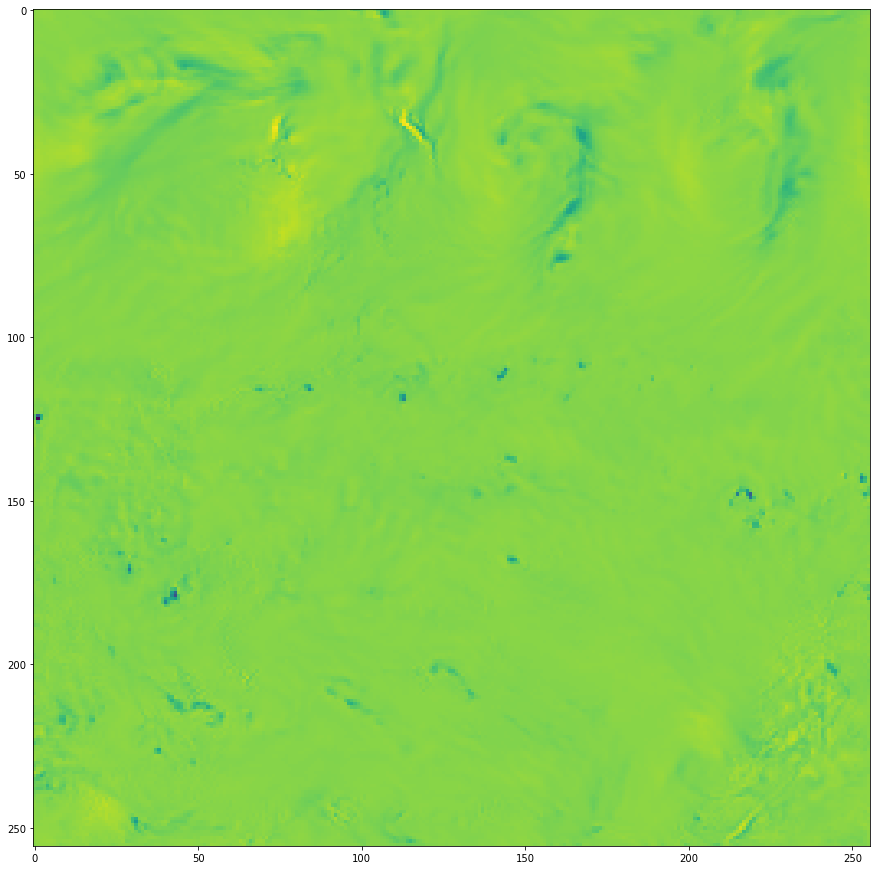

In [7]:
plt.imshow(generated_images[0,:,:,0])
plt.savefig("./climate_image_87615.jpg", dpi=200)